## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [ ]:
#importing the libraries

import numpy as np
import sklearn
import ssl
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import re
import numpy as np
from nltk.corpus import semcor
from nltk.tokenize import sent_tokenize
from nltk.tokenize import  word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>
[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


False

In [ ]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [ ]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train = fetch_20newsgroups(subset='train')

mydata_test = fetch_20newsgroups(subset='test')


In [ ]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [ ]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils._bunch.Bunch'>
<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output: 
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [ ]:
text = mydata_train.data
test = mydata_test.data

In [ ]:
lemma = WordNetLemmatizer()

## Preprocessing the Corpus

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

In [ ]:
# Preprocessing the data
lines = [] 
word_list = []

for line in text:
    #tokenize the text documents and update the lists word_list and lines
    line = line.lower()
    line = word_tokenize(line)
    line = [i for i in line if i.isalpha()]
    for word in line:
        word_list.append(word)
    lines.append(line)
# Make sure the word_list contains unique tokens
word_list = set(word_list)

# Calculate the total documents present in the corpus
total_docs = len(lines)
 
#Create a dictionary to keep track of index of each word
dict_idx = {key: val for val, key in enumerate(word_list)}

In [ ]:
# Create a frequency dictionary
 
def frequency_dict(lines, word_list):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}
    for word in word_list:
      freq_word[word] = 0
      for row in lines:
        if word in row:
          freq_word[word] += 1
    return freq_word

In [ ]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines,word_list)

freq_word

{'machen': 1,
 'furse': 1,
 'mcday': 1,
 'mediaeval': 3,
 'enjoyed': 27,
 'katan': 1,
 'foundations': 14,
 'markets': 31,
 'zimbelman': 1,
 'dolan': 1,
 'personalities': 7,
 'gbp': 1,
 'hyperons': 1,
 'lagged': 2,
 'watchit': 2,
 'kjrnevr': 1,
 'odell': 1,
 'litigant': 1,
 'junyan': 1,
 'thulcanra': 1,
 'latitudes': 2,
 'subtree': 1,
 'wqo': 1,
 'humbug': 2,
 'plants': 26,
 'istries': 1,
 'origins': 20,
 'senex': 1,
 'counntries': 3,
 'barsz': 1,
 'wuarchive': 11,
 'wishes': 61,
 'scream': 28,
 'dvax': 1,
 'theese': 1,
 'froehlich': 2,
 'encouragement': 3,
 'gwt': 1,
 'hian': 2,
 'nicol': 2,
 'insulator': 1,
 'claims': 247,
 'icyuzu': 1,
 'warriner': 1,
 'jrlk': 1,
 'tjl': 1,
 'mistaking': 2,
 'sawed': 1,
 'regulars': 13,
 'rsjoyce': 1,
 'clack': 4,
 'ranting': 14,
 'znkjzlahf': 1,
 'annex': 8,
 'sargon': 2,
 'settler': 2,
 'bwillard': 3,
 'conveniant': 2,
 'swe': 3,
 'buttonpress': 1,
 'kepley': 2,
 'nyjnlf': 2,
 'infinitude': 1,
 'fanzine': 1,
 'alt': 20,
 'fbihh': 13,
 'xli': 2,
 'o

In [ ]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    n = len(document)
    occurances = document.count(word)
    tf = occurances / n
    
    return tf

In [ ]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    n = len(lines)

    idf =  np.log((1+ n) / freq_word[word] + 1)
    return idf

In [ ]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vector = [0] * len(dict_idx)
    for word in sentence:
      tf_idf_vector[dict_idx[word]] = term_frequency(sentence, word) * inverse_df(word)
    return tf_idf_vector

In [ ]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus
tfidf_vector = []
for line in lines:
  tfidf_vector.append(tfidf(line, dict_idx))

## Multinomial Naive Bayes (10 Points)

In [ ]:
#Fit a Multinomial Naive Bayes Model on our dataset

model = MultinomialNB(alpha=0.0005)
model.fit(tfidf_vector, mydata_train.target)

MultinomialNB(alpha=0.0005)

In [ ]:
#Perform testing on the train dataset

pred = model.predict(tfidf_vector)

In [ ]:
#Calculate the F1 Score and the Accuracy

F1_score = f1_score(mydata_train.target, pred, average='weighted')
Accuracy = accuracy_score(mydata_train.target, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.9981439896534203
Accuracy:  0.9981438925225384


### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [ ]:
# install libraries
%pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import wikipedia
import numpy as np
import sklearn
from wikipedia.exceptions import WikipediaException
import ssl
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
# topics = ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science"]
# list of articles to be downloaded
articles = ["Northeastern Unversity", "Quantum machine learning", "Natural language processing", "Master in Data Science", "Artificial intelligence", "Data science", "International Monetary Fund", "European Central Bank", "Financial technology", 
 "Swimming", "Basketball", "Football", "College Football", "Association Football"]

# download and store articles (summaries) in this variable
data = []
for i in articles:
    data.append(wikipedia.summary(i))

article_summaries = {}

for i in articles:
    article_summaries.update({i : wikipedia.summary(i)})

data

[nltk_data] Downloading package punkt to /Users/nikhilg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhilg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nikhilg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/nikhilg/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['Northeastern University (NU or NEU) is a private research university with its main campus in Boston. Established in 1898, the university offers undergraduate and graduate programs on its main campus as well as satellite campuses in Charlotte, North Carolina; Seattle, Washington; San Jose, California; Oakland, California;  Portland, Maine; and Toronto and Vancouver in Canada. In 2019, Northeastern purchased the New College of the Humanities in London, England. The university\'s enrollment is approximately 19,000 undergraduate students and 8,600 graduate students. It is classified among "R1: Doctoral Universities – Very high research activity". Northeastern faculty and alumni include Nobel Prize laureates, Rhodes, Truman, and Marshall scholars. Undergraduate admission to the university is categorized as "most selective."Northeastern features a cooperative education program, more commonly known as "co-op," that integrates classroom study with professional experience and includes over 3,

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

I chose to clean the data before clustering it. I think cleaning the data helps in clustering because it helps in removal of unecessary words and symbols. It helps in proper cluster classification and reduces outliers.

**Answer(1-3 sentences):** 

In [ ]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')


cleandata = pd.DataFrame.from_dict(article_summaries, orient = 'index',columns = ['Summary'])

cleandata.reset_index(level=0, inplace=True)

#renaming the column name
cleandata = cleandata.rename(columns = {'index' : 'Article_Name'})

#tokenizing summary
#converting the summary to complete lowercase
cleandata['Terms'] = [x.lower() for x in cleandata.Summary]

#removing punctuations from the list of terms
cleandata['Terms'] = [''.join(c for c in s if c not in string.punctuation) for s in cleandata.Terms]

#finally tokenizing
cleandata['Terms'] = cleandata.apply(lambda row: nltk.word_tokenize(row['Terms']),axis=1)



### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(stop_words='english')
tfidf_m = tfidf_v.fit_transform(cleandata.Summary)
print(tfidf_m.shape)

(14, 1202)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [ ]:
from sklearn.manifold import TSNE
# call TSNE() to fit the data
m = TSNE()
tsne = m.fit_transform(tfidf_m)
tsne

/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 337.6229  ,  201.84097 ],
       [  58.24154 , -175.30563 ],
       [ 108.403824,  313.87262 ],
       [-405.91153 , -230.57045 ],
       [ 291.28354 , -302.82327 ],
       [-127.706   ,  147.46722 ],
       [-360.16086 ,  274.83286 ],
       [-392.08444 ,   24.787064],
       [ 321.7073  ,  -52.987007],
       [  54.6485  , -441.75748 ],
       [-176.49493 , -341.75128 ],
       [-123.00464 ,  413.49377 ],
       [  88.93165 ,   57.05558 ],
       [-158.61353 ,  -84.672356]], dtype=float32)

In [ ]:
x_cord, y_cord = tsne[:,0],tsne[:,1]

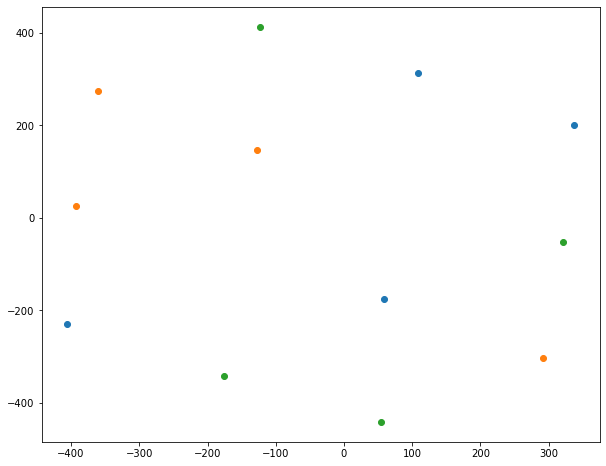

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

cluster_colors = {0: '#7570b3', 1: '#39C8C6', 2: '#1b9e77', 3: '#e7298a', 4: '#66a61e', 5: '#FFB139', 6: '#d95f02'}

#setting up cluster names using a dict
cluster_names = {0: 'President, party, election', 
                 1: 'Books, novels, copies',
                 2: 'Business, founder, executive',
                 3: 'Actor, film, drama', 
                 4: 'Titles, world, player',
                 5: 'Album, music, number'}

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x_cord[0:4],y_cord[0:4])
ax.scatter(x_cord[4:8],y_cord[4:8])
ax.scatter(x_cord[8:12],y_cord[8:12])

Plot and annotate the points with different markers for different expected groups.

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  


The seperation betewwnn the data is clear and disticnt yet they are not clearly cluster as they are no definite shapes to form the cluster.

# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc.., 

### We are providing train.txt and val.txt files along with this notebook. 

### Library Imports and Utility functions

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')


stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [2]:
# Import the train.txt and val.txt file into pandas dataframe format 

# train 
train = pd.read_csv("train.txt",sep = ";" ,header=None, names = ['text', 'emotion'])

# validation
val = pd.read_csv("val.txt",sep = ";" ,header=None, names = ['text', 'emotion'])

# and printout the train.shape and validation.shape 
print("Shape of training Dataset : ",train.shape)
print("Shape of testing Dataset : ",val.shape)

# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

Shape of training Dataset :  (16000, 2)
Shape of testing Dataset :  (2000, 2)


In [3]:
# clean the text in the train and validation dataframes using the clean_text function provided above
train_clean, val_clean = [], []
train_data = train.text.tolist()
val_data = val.text.tolist()

for text in train_data:
    train_clean.append(clean_text(text))
for text in val_data:
    val_clean.append(clean_text(text))    

In [4]:
# initialise count vectorizer from sklearn module with default parameter
count_vectorizer = CountVectorizer()

# fit on train dataset and transform both train and validation dataset
X_train = count_vectorizer.fit_transform(train_clean).toarray()
X_val = count_vectorizer.transform(val_clean).toarray()

print(X_train.shape)
print(X_val.shape)

(16000, 13457)
(2000, 13457)


In [5]:
# initialise tfidf vectorizer from sklearn module with default parameter
tfidf_vectorizer = TfidfVectorizer()

# fit on train dataset and transform both train and validation dataset

X_train_tf = tfidf_vectorizer.fit_transform(train_clean).toarray()
X_val_tf = tfidf_vectorizer.transform(val_clean).toarray()

print(X_train_tf.shape)
print(X_val_tf.shape)

(16000, 13457)
(2000, 13457)


In [ ]:
# # initialise label encoder from sklearn module
# le = preprocessing.LabelEncoder()

# # fit on train labels and transform both train and validation labels
# X_train_lenc = le.fit_transform(train['emotion'])
# X_val_lenc = le.transform(val['emotion'])
# X_train_lenc = pd.get_dummies(X_train_lenc)
# X_val_lenc = pd.get_dummies(X_val_lenc)

In [6]:
# initialise label encoder from sklearn module
le = preprocessing.LabelEncoder()

# fit on train labels and transform both train and validation labels
X_train_lenc = train.emotion.tolist()
X_val_lenc = val.emotion.tolist()

y_train_lenc = le.fit_transform(X_train_lenc)
y_val_lenc = le.fit_transform(X_val_lenc)

In [7]:
# convert the labels into one hot encoding form
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_enc = encoder.fit_transform(y_train_lenc.reshape(len(y_train_lenc),1)).toarray()
X_val_enc = encoder.fit_transform(y_val_lenc.reshape(len(y_val_lenc),1)).toarray()

In [8]:
%pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [30]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

  # layer 1 : input layer
  inp = tf.keras.Input((X.shape[1],))

  # layer 2 : add the dense layer with 2048 units and relu activation
  l2 = tf.keras.layers.Dense(2048, activation='relu')(inp)

  # layer 3 : add the dropout layer with dropout rate of 0.5
  l3 = tf.keras.layers.Dropout(0.5)(l2)

  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
  l4 = tf.keras.layers.Dense(1024,kernel_regularizer='l2',activation='tanh')(l3)

  # layer 5 : add the dropout layer with dropout rate of 0.5
  l5 = tf.keras.layers.Dropout(0.5)(l4)

  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
  l6= tf.keras.layers.Dense(512,kernel_regularizer='l2',activation='tanh')(l5)

  # layer 7 : add the dropout layer with dropout rate of 0.5
  l7 = tf.keras.layers.Dropout(0.5)(l6)

  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
  l8= tf.keras.layers.Dense(256,kernel_regularizer='l2',activation='tanh')(l7)

  # layer 9 : add the dropout layer with dropout rate of 0.5
  l9 = tf.keras.layers.Dropout(0.5)(l8)

  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
  l10= tf.keras.layers.Dense(128,kernel_regularizer='l2',activation='tanh')(l9)

  # layer 11 : add the dropout layer with dropout rate of 0.5
  l11 = tf.keras.layers.Dropout(0.5)(l10)

  # layer 12 : output layer with units equal to number of classes and activation as softmax
  out = tf.keras.layers.Dense(6, activation='softmax')(l11)
  model = tf.keras.models.Model(inputs=inp, outputs=out)

  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy 
  opt = tf.keras.optimizers.RMSprop(learning_rate=1e-03)
  model.compile(loss = 'categorical_crossentropy' , optimizer = opt, metrics = ['categorical_accuracy','AUC','Precision','Recall'])
  return model

In [31]:
# call the build_model function and initialize the model
model1 = build_model(X_train)
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13457)]           0         
                                                                 
 dense_6 (Dense)             (None, 2048)              27561984  
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0   

In [32]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
history1 = model1.fit(X_train, X_train_enc, validation_data=(X_val, X_val_enc), epochs=10,batch_size = 8)

Epoch 1/10
2000/2000 [==============================] - 546s 272ms/step - loss: 2.3440 - categorical_accuracy: 0.4230 - auc: 0.7923 - precision: 0.5968 - recall: 0.1522 - val_loss: 1.3083 - val_categorical_accuracy: 0.5815 - val_auc: 0.8805 - val_precision: 0.8113 - val_recall: 0.3160
Epoch 2/10
2000/2000 [==============================] - 524s 262ms/step - loss: 1.3109 - categorical_accuracy: 0.6118 - auc: 0.8864 - precision: 0.7126 - recall: 0.4498 - val_loss: 1.2677 - val_categorical_accuracy: 0.6625 - val_auc: 0.9011 - val_precision: 0.7173 - val_recall: 0.5595
Epoch 3/10
2000/2000 [==============================] - 620s 310ms/step - loss: 1.2114 - categorical_accuracy: 0.6700 - auc: 0.9089 - precision: 0.7412 - recall: 0.5673 - val_loss: 1.1909 - val_categorical_accuracy: 0.7055 - val_auc: 0.9125 - val_precision: 0.7626 - val_recall: 0.5750
Epoch 4/10
2000/2000 [==============================] - 668s 334ms/step - loss: 1.1593 - categorical_accuracy: 0.6908 - auc: 0.9189 - precisio

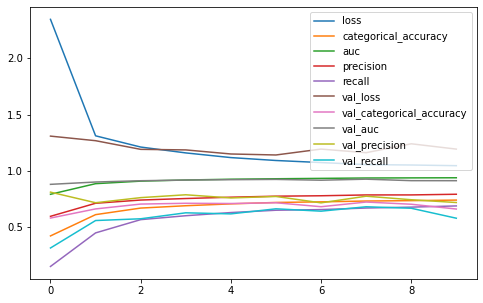

In [33]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
pd.DataFrame(history1.history).plot(figsize=(8,5))

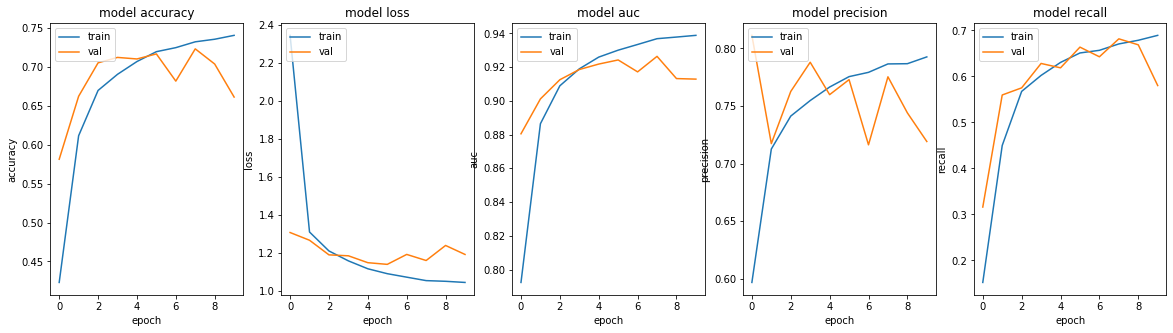

In [45]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,5)

#accuracy
subplot1 =plt.subplot(1,5,1)
subplot1.plot(history1.history['categorical_accuracy'])
subplot1.plot(history1.history['val_categorical_accuracy'])
subplot1.set_title('model accuracy')
subplot1.set_ylabel('accuracy')
subplot1.set_xlabel('epoch')
subplot1.legend(['train', 'val'], loc='upper left')

#loss
subplot2 =plt.subplot(1,5,2)
subplot2.plot(history1.history['loss'])
subplot2.plot(history1.history['val_loss'])
subplot2.set_title('model loss')
subplot2.set_ylabel('loss')
subplot2.set_xlabel('epoch')
subplot2.legend(['train', 'val'], loc='upper left')

#AUC
subplot3 =plt.subplot(1,5,3)
subplot3.plot(history1.history['auc'])
subplot3.plot(history1.history['val_auc'])
subplot3.set_title('model auc')
subplot3.set_ylabel('auc')
subplot3.set_xlabel('epoch')
subplot3.legend(['train', 'val'], loc='upper left')

#precision
subplot4 =plt.subplot(1,5,4)
subplot4.plot(history1.history['precision'])
subplot4.plot(history1.history['val_precision'])
subplot4.set_title('model precision')
subplot4.set_ylabel('precision')
subplot4.set_xlabel('epoch')
subplot4.legend(['train', 'val'], loc='upper left')

#recall
subplot4 =plt.subplot(1,5,5)
subplot4.plot(history1.history['recall'])
subplot4.plot(history1.history['val_recall'])
subplot4.set_title('model recall')
subplot4.set_ylabel('recall')
subplot4.set_xlabel('epoch')
subplot4.legend(['train', 'val'], loc='upper left')

Over time the loss of model decreases and the Accuracy , Precision, AUC and Recall increases

In [36]:
# again call the build_model function and initialize the model
model = build_model(X_train_tf)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 13457)]           0         
                                                                 
 dense_12 (Dense)            (None, 2048)              27561984  
                                                                 
 dropout_10 (Dropout)        (None, 2048)              0         
                                                                 
 dense_13 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_11 (Dropout)        (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 512)               524800    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0   

In [37]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
history = model.fit(X_train_tf, X_train_enc, epochs=10,batch_size = 8, validation_data=(X_val_tf, X_val_enc))

Epoch 1/10
2000/2000 [==============================] - 683s 341ms/step - loss: 1.9716 - categorical_accuracy: 0.3696 - auc: 0.7837 - precision: 0.4909 - recall: 0.0943 - val_loss: 1.3685 - val_categorical_accuracy: 0.4340 - val_auc: 0.8566 - val_precision: 0.6279 - val_recall: 0.2700
Epoch 2/10
2000/2000 [==============================] - 661s 330ms/step - loss: 1.3243 - categorical_accuracy: 0.5361 - auc: 0.8738 - precision: 0.6618 - recall: 0.3241 - val_loss: 1.2514 - val_categorical_accuracy: 0.6310 - val_auc: 0.8980 - val_precision: 0.7109 - val_recall: 0.5225
Epoch 3/10
2000/2000 [==============================] - 698s 349ms/step - loss: 1.2046 - categorical_accuracy: 0.6455 - auc: 0.9054 - precision: 0.7283 - recall: 0.5255 - val_loss: 1.1924 - val_categorical_accuracy: 0.6650 - val_auc: 0.9069 - val_precision: 0.7591 - val_recall: 0.5215
Epoch 4/10
2000/2000 [==============================] - 704s 352ms/step - loss: 1.1423 - categorical_accuracy: 0.6848 - auc: 0.9168 - precisio

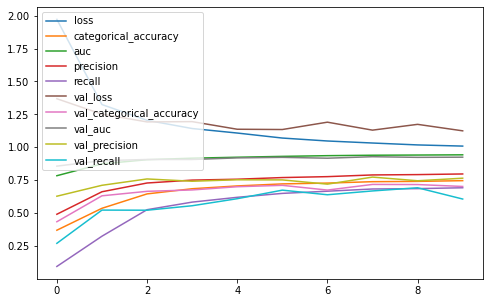

In [38]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
pd.DataFrame(history.history).plot(figsize=(8,5))

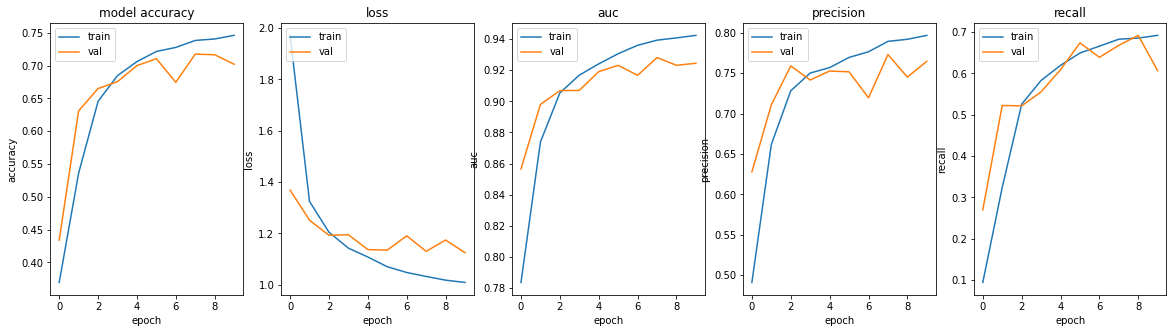

In [46]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

#accuracy
subplot1 =plt.subplot(1,5,1)
subplot1.plot(history.history['categorical_accuracy'])
subplot1.plot(history.history['val_categorical_accuracy'])
subplot1.set_title('model accuracy')
subplot1.set_ylabel('accuracy')
subplot1.set_xlabel('epoch')
subplot1.legend(['train', 'val'], loc='upper left')

#loss
subplot2 =plt.subplot(1,5,2)
subplot2.plot(history.history['loss'])
subplot2.plot(history.history['val_loss'])
subplot2.set_title('loss')
subplot2.set_ylabel('loss')
subplot2.set_xlabel('epoch')
subplot2.legend(['train', 'val'], loc='upper left')

#AUC
subplot3 =plt.subplot(1,5,3)
subplot3.plot(history.history['auc'])
subplot3.plot(history.history['val_auc'])
subplot3.set_title('auc')
subplot3.set_ylabel('auc')
subplot3.set_xlabel('epoch')
subplot3.legend(['train', 'val'], loc='upper left')

#precision
subplot4 =plt.subplot(1,5,4)
subplot4.plot(history.history['precision'])
subplot4.plot(history.history['val_precision'])
subplot4.set_title('precision')
subplot4.set_ylabel('precision')
subplot4.set_xlabel('epoch')
subplot4.legend(['train', 'val'], loc='upper left')

#recall
subplot4 =plt.subplot(1,5,5)
subplot4.plot(history.history['recall'])
subplot4.plot(history.history['val_recall'])
subplot4.set_title('recall')
subplot4.set_ylabel('recall')
subplot4.set_xlabel('epoch')
subplot4.legend(['train', 'val'], loc='upper left')

Over time the loss of model decreases and the Accuracy , Precision, AUC and Recall increases.

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

Glove and Word2vec are both unsupervised models for generating word vectors. The difference between them is the mechanism of generating word vectors. The word vectors generated by either of these models can be used for a wide variety of tasks ranging from finding words that are semantically similar or representing a word when it is being input to a model. 
A word embedding representation of a word captures more information about a word than just a one-hot representation of the word, since the former captures semantic similarity of that word to other words whereas the latter representation of the word is equidistant from all other words.
While word2vec can be seen as a model that improves its ability to predict and GloVe is modeled to do dimensionality reduction. This reduction is on the co-occurrence counts matrix. Reconstruction loss tries to find the lower-dimensional representations.

Tf-idf is a scoring scheme for words. It gives a measure of how important a word is to a document.
Word2vec produces one vector per word, whereas tf-idf produces a score. Word2vec is great for going deeper into the documents we have and helps in identifying content and subsets of content. Its vectors represent each word’s context.

While tf-idf is a simple scoring scheme and that is its key advantage, word embeddings may be a better choice for most tasks where tf-idf is used, particularly when the task can benefit from the semantic similarity captured by word embeddings.


What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

The Bag of Words (BoW) model is the simplest form of text representation in numbers. Like the term itself, we can represent a sentence as a bag of words vector.
It builds a vocabulary from all the unique words. Then take each of these words and mark their occurrence. That’s the core idea behind a Bag of Words (BoW) model

Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
It is a measure of how frequently a term appears in a document. 
Term Frequent we take the number of occurances each term has in the document. IDF is a measure of how important a term is. 
Then TF-IDF score for each word in the corpus is computed. Words with a higher score are more important, and those with a lower score are less important.
TF-IDF also gives larger values for less frequent words and is high when both IDF and TF values are high i.e the word is rare in all the documents combined but frequent in a single document.

The major difference when implementing Naive Bayes using BoW and TF-IDF that the TF-IDF implementation model tends to outperform the BoW implementation if the vocabulary size is relatively large. 
However, the performance of machine learning algorithms is highly dependent on the appropriate choice of features. In case of naive Bayes classifier huge differences in performance depends on the choices of stop word removal, stemming, and token-length.
In practice, it is recommended that the choice should be made after considering comparative studies including different combinations of feature extraction and selection steps.